In [1]:
import numpy as np
import tomopy 
import matplotlib.pyplot as plt
from tomoplan.gan3d import GAN3d
import tifffile

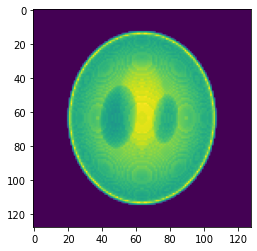

0.0 32.000046
0.0 1.0


In [4]:
data = tomopy.shepp3d()
ang = tomopy.angles(181)
prj = tomopy.project(data, ang, pad=False)
train_input = prj[0]
plt.imshow(train_input)
plt.show()
print(train_input.min(), train_input.max())
print(data.min(), data.max())

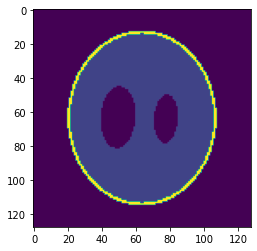

In [3]:
train_output = np.swapaxes(data, 0, 1)
plt.imshow(train_output[64,:,:])
plt.show()

In [4]:
train_obj = GAN3d(train_input, train_output, iter_num=2000)
recon = train_obj.train

2022-08-08 14:02:02.732953: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 14:02:03.116133: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46152 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:65:00.0, compute capability: 8.6
2022-08-08 14:02:06.604673: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2022-08-08 14:02:08.460930: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Iteration 1: G_loss is 5.1431989669799805 and D_loss is 1.3758819103240967
Iteration 2: G_loss is 2.6219258308410645 and D_loss is 1.3620946407318115
Iteration 3: G_loss is 2.2200794219970703 and D_loss is 1.3507602214813232
Iteration 4: G_loss is 2.0926575660705566 and D_loss is 1.3388009071350098
Iteration 5: G_loss is 1.9166450500488281 and D_loss is 1.3415663242340088
Iteration 6: G_loss is 1.802001714706421 and D_loss is 1.4202224016189575
Iteration 7: G_loss is 1.7052743434906006 and D_loss is 1.324178695678711
Iteration 8: G_loss is 1.6229901313781738 and D_loss is 1.3435930013656616
Iteration 9: G_loss is 1.5599843263626099 and D_loss is 1.4140993356704712
Iteration 10: G_loss is 1.5285372734069824 and D_loss is 1.3324158191680908
Iteration 11: G_loss is 1.500539779663086 and D_loss is 1.2439059019088745
Iteration 12: G_loss is 1.4916651248931885 and D_loss is 1.2918353080749512
Iteration 13: G_loss is 1.4821515083312988 and D_loss is 1.374443769454956
Iteration 14: G_loss is 1

In [5]:
recon = recon.numpy()

tifffile.imwrite('/data/3d_test.tiff', recon.reshape((128, 128, 128)))

In [7]:
tifffile.imwrite('/data/3d_output.tiff', train_output)